# Principal Component Analysis from Scratch

This notebook implements PCA manually: it standardizes the data, computes the covariance matrix, extracts the eigenvalues and eigenvectors, and projects the dataset onto the top k principal components.

The idea behind PCA is to transform the original features into a new set of orthogonal directions that capture the maximum variance in the data. By keeping only the top components, PCA reduces dimensionality while preserving the most important structure.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def pca(points, k):

    # Scaling features
    mu = np.mean(points, axis=0)
    sigma = np.std(points, axis=0)
    scaled = (points-mu)/sigma

    # Compute covariance matrix
    n = len(points)
    cov = 1/(n-1)*(scaled.T @ scaled)
    #print(cov)

    # Get the k vectors corresponding with the largest eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    idxs = np.argsort(eigenvalues)[::-1][:k]

    k_vectors = eigenvectors[:, idxs]
    #print(k_vectors)

    # Get projected data
    pca_data = scaled @ k_vectors

    return pca_data


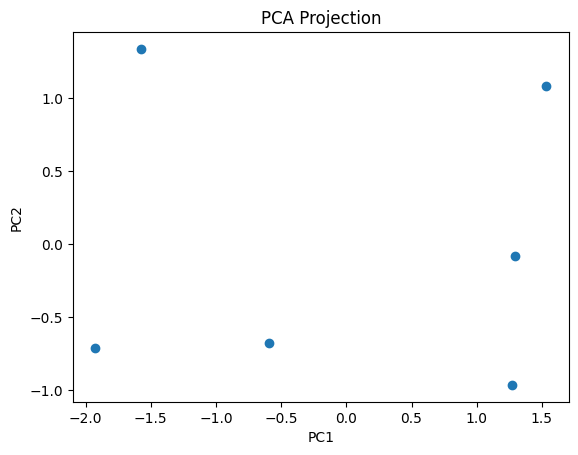

In [8]:
points = np.array([
    [0, 0, 0], 
    [1, 0.5, 0.3], 
    [2, 1, 1], 
    [1.5, -1, -1],
    [2.5, -1.5, -2], 
    [3.5, -2, 0]
])

pca_data = pca(points, 2)

# Visualize 
x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

This can be done with the sklearn library as follows:

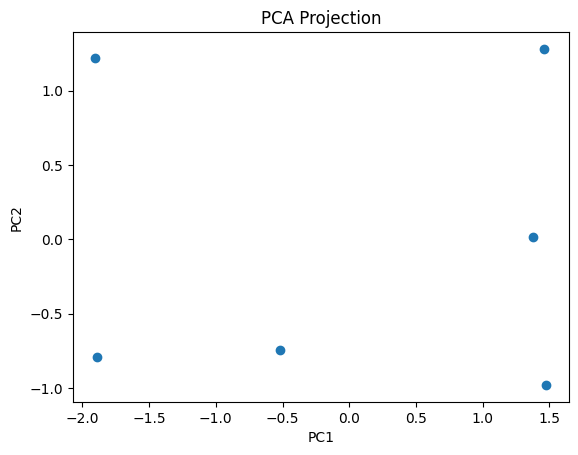

In [9]:
from sklearn.decomposition import PCA

pca_sklearn = PCA(n_components=2)
pca_data_sklearn = pca_sklearn.fit_transform(points)

# Visualize 
x_sk = pca_data_sklearn[:, 0]
y_sk = pca_data_sklearn[:, 1]

plt.scatter(x_sk, y_sk)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()